# Homework 03


## Part 1 - Questions

### Question 1: 

Which district has the highest average SAT score？

* Who (population): districts
* What (subject, discipline): average SAT score
* Where (location): New York City
* When (snapshot, longitudinal): Not applicable
* How much data do you need to do the analysis/work: Slice the first two character and put them into different lists. And calculate the average SAT for each list

### Question 2: 

Which district has the most uneven distribution of students?

* Who (population): districts
* What (subject, discipline): uneven distribution
* Where (location): New York City
* When (snapshot, longitudinal): Not applicable
* How much data do you need to do the analysis/work: From the number of the students taken the exam, we can approximate how many students are there in each school

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?
Department of Education (DOE)


## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: 2012 SAT Results
2. Link to Data: https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4
3. Source / Origin: 
	* Author or Creator: Department of Education (DOE)
	* Publication Date: February 20, 2013
	* Publisher: NYC OpenData
	* Version or Data Accessed: 1.0
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format




### Overview

* Format: csv
* Size: 28k
* Number of Records: 478



### Sample of Data




In [2]:
import csv

with open('../data/raw/2012_SAT_Results.csv', "r") as f:
    next(f)
    line_count = 0
    for line in csv.reader(f):
        print(line)
        line_count += 1
        if line_count == 10:
            break



# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 

['01M292', 'HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES', '29', '355', '404', '363']
['01M448', 'UNIVERSITY NEIGHBORHOOD HIGH SCHOOL', '91', '383', '423', '366']
['01M450', 'EAST SIDE COMMUNITY SCHOOL', '70', '377', '402', '370']
['01M458', 'FORSYTH SATELLITE ACADEMY', '7', '414', '401', '359']
['01M509', 'MARTA VALLE HIGH SCHOOL', '44', '390', '433', '384']
['01M515', 'LOWER EAST SIDE PREPARATORY HIGH SCHOOL', '112', '332', '557', '316']
['01M539', 'NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL', '159', '522', '574', '525']
['01M650', 'CASCADES HIGH SCHOOL', '18', '417', '418', '411']
['01M696', 'BARD HIGH SCHOOL EARLY COLLEGE', '130', '624', '604', '628']
['02M047', '47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECONDARY SCHOOL', '16', '395', '400', '387']



### Fields or Column Headers

* Field/Column 1: DBN String
* Field/Column 2: SCHOOL NAME String
* Field/Column 3: Num of SAT Test Takers
* Field/Column 4: SAT Critical Reading Avg. Score
* Field/Column 5: SAT Math Avg. Score
* Field/Column 6: SAT Writing Avg. Score

## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform


In [3]:
table = []
scores = {}
districts = {}
arr = []
import numpy as np
with open('../data/raw/2012_SAT_Results.csv', "r") as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)  # read and ignore the header row
    for row in csv_reader:
        if row[3] != 's': #filter missing data
            row[0] = row[0][:2]  # extract first two characters of the first column
            table.append(row)

for line in table:
    if line[0] not in districts:
        districts[line[0]] = int(line[2])
    else:
        districts[line[0]]+=int(line[2])
    if line[0] not in scores:
        scores[line[0]]=int(line[3])*int(line[2])
        scores[line[0]]+=int(line[4])*int(line[2])
        scores[line[0]]+=int(line[5])*int(line[2])
    else:
        scores[line[0]]+=int(line[3])*int(line[2])
        scores[line[0]]+=int(line[4])*int(line[2])
        scores[line[0]]+=int(line[5])*int(line[2])


## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [4]:
#The average SAT score for all students in New York City
totalScore = sum(scores.values())
totalStudent = sum(districts.values())
print('The average SAT score for all students in New York City is {:.3f}'.format(totalScore/totalStudent))
average = {}
for key in districts:
    if key in scores:
        average[key] =  scores[key] / districts[key]
max_value = None
max_key = None
for key, value in average.items():
    if max_value is None or value > max_value:
        max_value = value
        max_key = key

print("The district", max_key, 'has the highest average SAT socres', max_value)

The average SAT score for all students in New York City is 1326.684
The district 13 has the highest average SAT socres 1573.3613138686133


#### Dispersion

In [5]:
print('The variance of distribution of students in New York City is',np.var(list(districts.values())))


dbn_sums = {}

for row in table:
    dbn = row[0]
    score = int(row[2])
    if dbn in dbn_sums:
        dbn_sums[dbn].append(score)
    else:
        dbn_sums[dbn] = [score]


variances = {}
for dbn, score_list in dbn_sums.items():
    variance = np.var(score_list)
    variances[dbn] = variance

max_value = None
max_key = None
for key, value in variances.items():
    if max_value is None or value > max_value:
        max_value = value
        max_key = key

print(f'The district with the most unevenly distributed student is {max_key}, its variance is {max_value}')

The variance of distribution of students in New York City is 1351520.3814878892
The district with the most unevenly distributed student is 26, its variance is 91448.16


#### Outliers


In [6]:
values = np.array(list(districts.values()))
q1 = np.percentile(values, 25)
q3 = np.percentile(values, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [key for key, value in districts.items() if (value < lower_bound or value > upper_bound)]
print('Outliers:', outliers)
print('District',*outliers, 'has too many students')

Outliers: ['02']
District 02 has too many students


#### Other


In [7]:
# TODO: copy and paste your results here
print('The range of number of students in each district is from', min(districts.values()),'to', max(districts.values()))

The range of number of students in each district is from 17 to 6175


###  Analysis on Categorical Data

#### Frequency

In [8]:
borough = {'M':0, 'X':0, 'Q':0, 'K':0, 'R':0}
with open('../data/raw/2012_SAT_Results.csv', "r") as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)  # read and ignore the header row
    for row in csv_reader:
        if row[3] != 's': #filter missing data
            borough[row[0][2]]+=1
print(borough)

{'M': 106, 'X': 110, 'Q': 70, 'K': 123, 'R': 12}


#### Unique Values

In [9]:
print(borough.keys())
#The five borough of NYC, the Bronx, Brooklyn, Manhattan, Queens and Staten Island.

dict_keys(['M', 'X', 'Q', 'K', 'R'])

## Part 5 - Visualizations



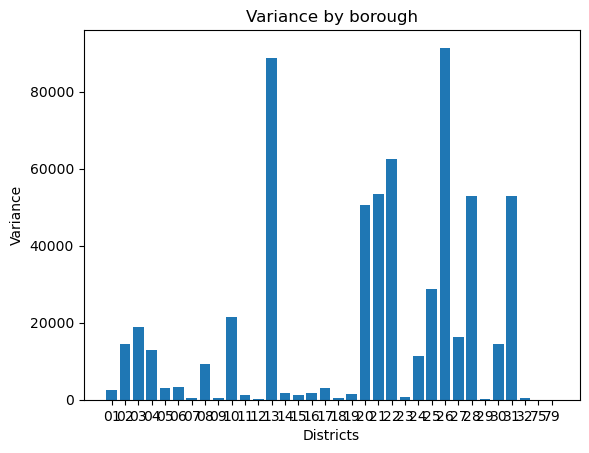

In [12]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.bar(variances.keys(), variances.values())
ax.set_title("Variance by borough")
ax.set_xlabel("Districts")
ax.set_ylabel("Variance")

plt.show()

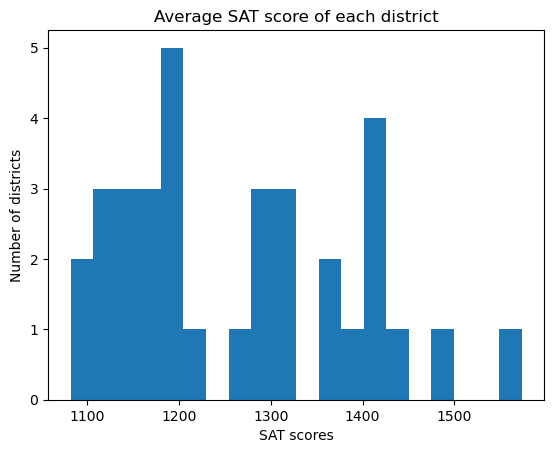

In [18]:
values = list(average.values())

fig, ax = plt.subplots()
ax.hist(values, bins=20)
ax.set_title("Average SAT score of each district")
ax.set_xlabel("SAT scores")
ax.set_ylabel("Number of districts")

plt.show()

The first diagram describes the variance of the number of students in each district. The variance is very small in most districts, indicating that in most districts, the number of students per school is about the same. The variance in districts 13 and 26 is much larger than in the other districts. There may be a very large high schools in the district.

The first diagram describes the average SAT score of each district. The diagram largely conform to normal distribution. The diagram skewed left. The average score for students in most districts is around 1200. Some districts have an average score of over 1500. This symbolizes some of the uneven distribution of educational resources

## Part 6 - Conclusion

Which district has the highest average SAT score？
The district 13 has the highest average SAT socres 1573.36 and district 13 is the only district with over 1500 average SAT score.

Which district has the most uneven distribution of students?

The district 13 and 26 have very high variance. The previous question mentioned that District 13 had the highest average score. It shows that there are many high schools with many students and take up most of the educational resources


## Part 7 - Heights and Weights


The correlation coefficient between height and weight is: 0.495977755505891


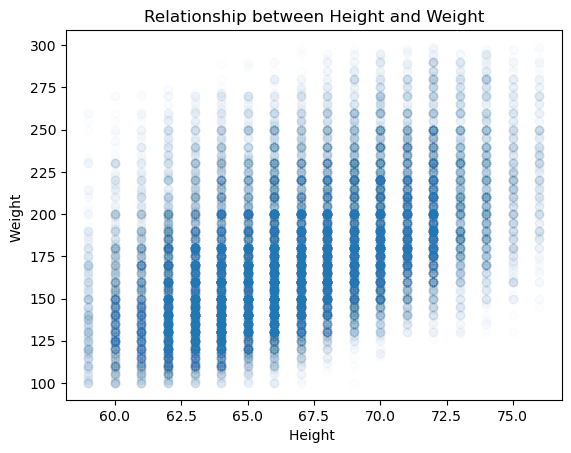

In [62]:
from collections import Counter
import numpy as np
weights = []
heights = []
with open('../data/raw/adult19.csv', "r") as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    for row in reader:
        if row[49] != '' and row[50] != '':
            weights.append(int(row[49]))
            heights.append(int(row[50]))

weights = []
heights = []
with open('../data/raw/adult19.csv', "r") as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    for row in reader:
        if row[49] != '' and row[50] != '' and int(row[49]) < 500 and int(row[50]) < 90:
            weights.append(int(row[49]))
            heights.append(int(row[50]))
wCounts = Counter(weights)
hCounts = Counter(heights)
corr_coef = np.corrcoef(heights, weights)[0, 1]
print("The correlation coefficient between height and weight is:", corr_coef)
plt.scatter(heights, weights, alpha=0.01)
plt.xlabel('Height ')
plt.ylabel('Weight ')
plt.title('Relationship between Height and Weight')
plt.show()



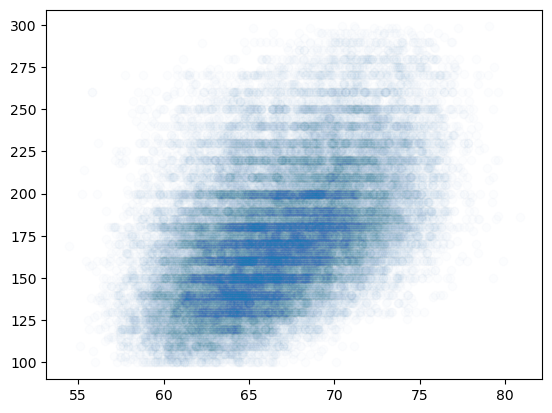

In [73]:
import matplotlib.pyplot as pyplot
import random
pyplot.scatter(heights, weights,alpha=0.01)

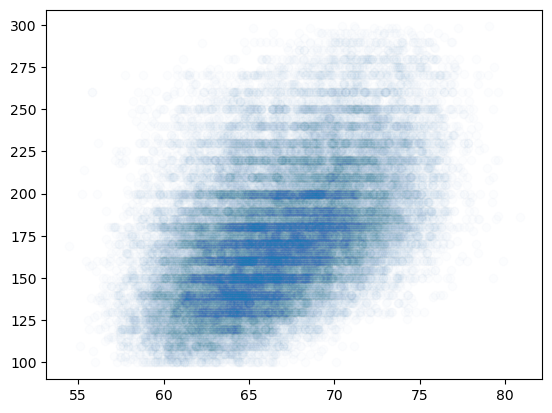

In [72]:
jitter = 0.5
heights = [h + random.uniform(-jitter, jitter) for h in heights]
pyplot.scatter(heights, weights,alpha=0.01)